In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from textblob import TextBlob

import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from scipy.stats import ttest_ind

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mirfayzirgashev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Loading the dataset

df = pd.read_csv('../data/reviews.csv', index_col=0)
df

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...
568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."


In [3]:
# Displaying the first five rows of the dataset

df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
# Displaying information about the dataset

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 568454 entries, 1 to 568454
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   ProductId               568454 non-null  str  
 1   UserId                  568454 non-null  str  
 2   ProfileName             568428 non-null  str  
 3   HelpfulnessNumerator    568454 non-null  int64
 4   HelpfulnessDenominator  568454 non-null  int64
 5   Score                   568454 non-null  int64
 6   Time                    568454 non-null  int64
 7   Summary                 568427 non-null  str  
 8   Text                    568454 non-null  str  
dtypes: int64(4), str(5)
memory usage: 39.0 MB


In [5]:
# Displaying statistical summary of the dataset

df.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,1.743817,2.22881,4.183199,1.296257e+09
std,7.636513,8.28974,1.310436,4.804331e+07
min,0.000000,0.00000,1.000000,9.393408e+08
25%,0.000000,0.00000,4.000000,1.271290e+09
50%,0.000000,1.00000,5.000000,1.311120e+09
75%,2.000000,2.00000,5.000000,1.332720e+09
max,866.000000,923.00000,5.000000,1.351210e+09


In [6]:
# Displaying the 148th row of the dataset

df.iloc[147]

ProductId                                                        B0017I8UME
UserId                                                        ATBE88PKKQTRA
ProfileName                                            Matthew R Lehmkuhler
HelpfulnessNumerator                                                      0
HelpfulnessDenominator                                                    0
Score                                                                     5
Time                                                             1344384000
Summary                                                    Love the salsa!!
Text                      This is one of the best salsas that I have fou...
Name: 148, dtype: object

In [7]:
# Displaying the 'Text' column of the 148th row

df.iloc[147]['Text']

'This is one of the best salsas that I have found in a long time but stay away from the variety pack. The other two that come with it are not worth your money.'

In [8]:
# Counting occurrences of each score in the 'Score' column

score_counts = df["Score"].value_counts().sort_index()
score_counts

Score
1     52268
2     29769
3     42640
4     80655
5    363122
Name: count, dtype: int64

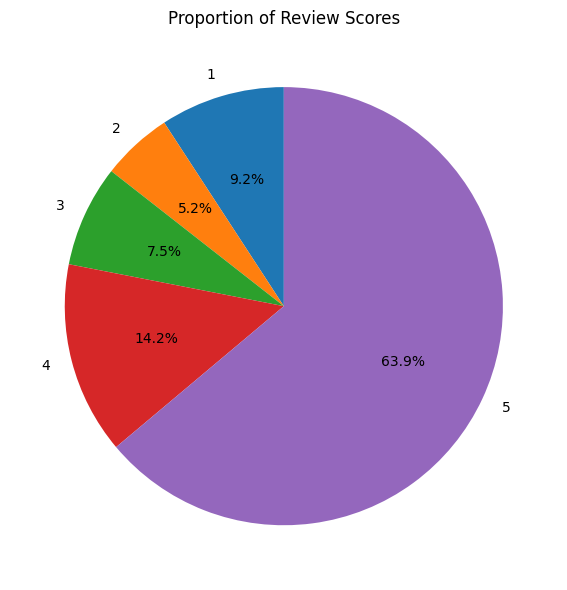

In [9]:
# Visualizing the score distribution with a pie chart

plt.figure(figsize=(6, 6))
plt.pie(
    score_counts.values,
    labels=score_counts.index.astype(str), # Convert index to string for labels
    autopct="%1.1f%%", # Display percentages
    startangle=90
)
plt.title("Proportion of Review Scores")
plt.tight_layout()
plt.show()

In [10]:
# Checking for missing values in the dataset

df.isna().sum()

ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [11]:
# Dropping rows with missing values and checking again for missing values

df.dropna(inplace = True)
df.isna().sum()

ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [12]:
# Creating a new column 'helpfulness_ratio' as the ratio of 'HelpfulnessNumerator' to 'HelpfulnessDenominator'

df["helpfulness_ratio"] = df["HelpfulnessNumerator"] / df["HelpfulnessDenominator"]
df

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfulness_ratio
Id,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,NaN
...,...,...,...,...,...,...,...,...,...,...
568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,NaN
568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,NaN
568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0


In [13]:
# Filling NaN values in 'helpfulness_ratio' with 0

df["helpfulness_ratio"] = df["helpfulness_ratio"].fillna(0)
df

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfulness_ratio
Id,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.0
...,...,...,...,...,...,...,...,...,...,...
568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,0.0
568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,0.0
568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0


In [14]:
# Creating a new column 'review_length' as the number of words in the 'Text' column

df["review_length"] = df["Text"].apply(lambda x: len(x.split()))
df

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfulness_ratio,review_length
Id,,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,48
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0,31
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,94
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,41
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.0,27
...,...,...,...,...,...,...,...,...,...,...,...
568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,0.0,26
568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,0.0,46
568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0,66


In [15]:
# Filtering out reviews with less than 10 words

df = df[df["review_length"] >= 15]
df

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfulness_ratio,review_length
Id,,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,48
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0,31
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,94
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,41
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.0,27
...,...,...,...,...,...,...,...,...,...,...,...
568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,0.0,26
568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,0.0,46
568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0,66


In [16]:
# Performing sentiment analysis on the 'Text' column and creating new columns for sentiment label and score

def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity  # range [-1, 1]

    if polarity > 0:
        label = "POSITIVE"
    elif polarity < 0:
        label = "NEGATIVE"
    else:
        label = "NEUTRAL"

    return pd.Series([label, polarity])

df[["sentiment_label", "sentiment_score"]] = (
    df["Text"]
    .astype(str)
    .apply(get_sentiment)
)
df

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfulness_ratio,review_length,sentiment_label,sentiment_score
Id,,,,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,48,POSITIVE,0.450000
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0,31,NEGATIVE,-0.033333
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,94,POSITIVE,0.133571
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,41,POSITIVE,0.166667
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.0,27,POSITIVE,0.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,0.0,26,POSITIVE,0.365000
568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,0.0,46,NEGATIVE,-0.208333
568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0,66,NEGATIVE,-0.021875


In [17]:
# Stop word initialization

stop_words = set(stopwords.words("english"))

In [18]:
# Initializing the Porter Stemmer

stemmer = PorterStemmer()

def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    
    # Removing punctuation and numbers
    text = re.sub(r"[^a-z\s]", "", text)
    
    # Stopword removal + stemming
    tokens = [
        stemmer.stem(word)
        for word in text.split()
        if word not in stop_words
    ]
    
    return " ".join(tokens)

In [19]:
# Applying preprocessing

df["clean_text"] = df["Text"].astype(str).apply(preprocess_text)
df

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfulness_ratio,review_length,sentiment_label,sentiment_score,clean_text
Id,,,,,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,48,POSITIVE,0.450000,bought sever vital can dog food product found ...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0,31,NEGATIVE,-0.033333,product arriv label jumbo salt peanutsth peanu...
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,94,POSITIVE,0.133571,confect around centuri light pillowi citru gel...
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,41,POSITIVE,0.166667,look secret ingredi robitussin believ found go...
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.0,27,POSITIVE,0.483333,great taffi great price wide assort yummi taff...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,0.0,26,POSITIVE,0.365000,great sesam chickenthi good better restur eate...
568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,0.0,46,NEGATIVE,-0.208333,im disappoint flavor chocol note especi weak m...
568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0,66,NEGATIVE,-0.021875,star small give one train session tri train do...


In [20]:
# Presenting correlation between review length and helpfulness ratio, before modeling

correlation = df["review_length"].corr(df["helpfulness_ratio"])
print(f"Correlation between review length and helpfulness: {correlation:.3f}")

Correlation between review length and helpfulness: 0.123


In [21]:
# Preparing data for linear regression

X = df[["review_length"]]
y = df["helpfulness_ratio"]

In [22]:
# Fitting the linear regression model

model = LinearRegression()
model.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [23]:
# Displaying regression results

print("Regression coefficient (effect of review length):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R^2 score:", model.score(X, y))

Regression coefficient (effect of review length): 0.0007173504787108202
Intercept: 0.35002678308673807
R^2 score: 0.015226379890645014


In [24]:
# Preparing data for linear regression

X = df[["sentiment_score", "review_length"]]
y = df["helpfulness_ratio"]

In [25]:
# Splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Initializing Random Forest Regressor with hyperparameters

rf_model = RandomForestRegressor(
    n_estimators=200,  # number of trees
    max_depth=5,       # limit depth to prevent overfitting
    random_state=42
)

# Fit model
rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples a

In [27]:
# Evaluate model

y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Random Forest R^2 on test set:", r2)

Random Forest R^2 on test set: 0.023230324772892108


In [28]:
# Feature importance

importances = rf_model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("\nFeature importances:\n", feature_importance)


Feature importances:
 review_length      0.967243
sentiment_score    0.032757
dtype: float64


In [29]:
# Average helpfulness ratio by sentiment

sentiment_helpfulness = (
    df.groupby("sentiment_label")["helpfulness_ratio"]
    .mean()
    .sort_values(ascending=False)
)

sentiment_helpfulness

sentiment_label
POSITIVE    0.409048
NEGATIVE    0.405326
NEUTRAL     0.347079
Name: helpfulness_ratio, dtype: float64

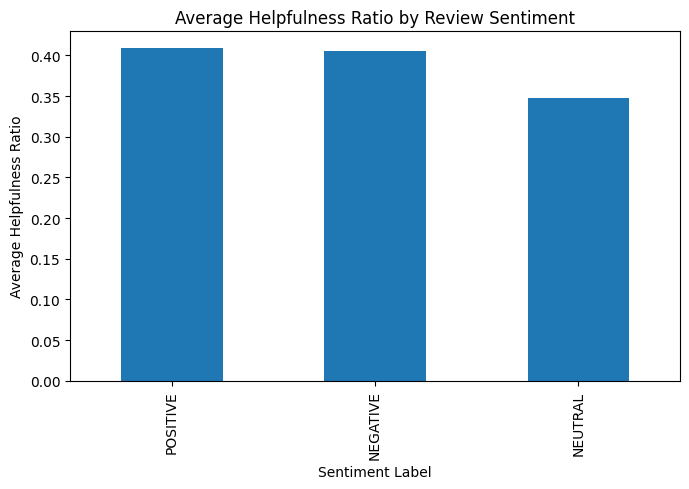

In [30]:
# Visualizing average helpfulness ratio by sentiment

sentiment_helpfulness.plot(
    kind="bar",
    figsize=(7, 5),
    title="Average Helpfulness Ratio by Review Sentiment",
    ylabel="Average Helpfulness Ratio",
    xlabel="Sentiment Label"
)

plt.tight_layout()
plt.show()

In [31]:
# Performing t-test to compare helpfulness ratios between negative and positive reviews

negative_helpfulness = df[df["sentiment_label"] == "NEGATIVE"]["helpfulness_ratio"]
positive_helpfulness = df[df["sentiment_label"] == "POSITIVE"]["helpfulness_ratio"]

t_stat, p_value = ttest_ind(
    negative_helpfulness,
    positive_helpfulness,
    equal_var=False
)

t_stat, p_value

(np.float64(-1.9298502262015207), np.float64(0.05362921235921703))

In [32]:
# Adding subjectivity scores to the dataset

df["subjectivity"] = df["Text"].astype(str).apply(
    lambda x: TextBlob(x).sentiment.subjectivity
)
df

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfulness_ratio,review_length,sentiment_label,sentiment_score,clean_text,subjectivity
Id,,,,,,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,48,POSITIVE,0.450000,bought sever vital can dog food product found ...,0.433333
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0,31,NEGATIVE,-0.033333,product arriv label jumbo salt peanutsth peanu...,0.762963
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,94,POSITIVE,0.133571,confect around centuri light pillowi citru gel...,0.448571
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,41,POSITIVE,0.166667,look secret ingredi robitussin believ found go...,0.533333
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.0,27,POSITIVE,0.483333,great taffi great price wide assort yummi taff...,0.637500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,0.0,26,POSITIVE,0.365000,great sesam chickenthi good better restur eate...,0.605000
568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,0.0,46,NEGATIVE,-0.208333,im disappoint flavor chocol note especi weak m...,0.408333
568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0,66,NEGATIVE,-0.021875,star small give one train session tri train do...,0.418750


In [33]:
# Classifying reviews as EMOTIONAL or INFORMATIONAL based on subjectivity scores

df["expressiveness_type"] = df["subjectivity"].apply(
    lambda x: "EMOTIONAL" if x >= 0.5 else "INFORMATIONAL"
)
df

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfulness_ratio,review_length,sentiment_label,sentiment_score,clean_text,subjectivity,expressiveness_type
Id,,,,,,,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,48,POSITIVE,0.450000,bought sever vital can dog food product found ...,0.433333,INFORMATIONAL
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0,31,NEGATIVE,-0.033333,product arriv label jumbo salt peanutsth peanu...,0.762963,EMOTIONAL
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,94,POSITIVE,0.133571,confect around centuri light pillowi citru gel...,0.448571,INFORMATIONAL
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,41,POSITIVE,0.166667,look secret ingredi robitussin believ found go...,0.533333,EMOTIONAL
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.0,27,POSITIVE,0.483333,great taffi great price wide assort yummi taff...,0.637500,EMOTIONAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,0.0,26,POSITIVE,0.365000,great sesam chickenthi good better restur eate...,0.605000,EMOTIONAL
568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,0.0,46,NEGATIVE,-0.208333,im disappoint flavor chocol note especi weak m...,0.408333,INFORMATIONAL
568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0,66,NEGATIVE,-0.021875,star small give one train session tri train do...,0.418750,INFORMATIONAL


In [34]:
# Average helpfulness ratio by expressiveness type

expressiveness_helpfulness = (
    df.groupby("expressiveness_type")["helpfulness_ratio"]
    .mean()
)

expressiveness_helpfulness

expressiveness_type
EMOTIONAL        0.399205
INFORMATIONAL    0.424366
Name: helpfulness_ratio, dtype: float64

In [35]:
# Exploring different subjectivity thresholds for classifying reviews as EMOTIONAL or INFORMATIONAL

for t in [0.4, 0.5, 0.6]:
    df["expr_tmp"] = df["subjectivity"].apply(
        lambda x: "EMOTIONAL" if x >= t else "INFORMATIONAL"
    )
    print(t, df.groupby("expr_tmp")["helpfulness_ratio"].mean())

0.4 expr_tmp
EMOTIONAL        0.408352
INFORMATIONAL    0.403539
Name: helpfulness_ratio, dtype: float64
0.5 expr_tmp
EMOTIONAL        0.399205
INFORMATIONAL    0.424366
Name: helpfulness_ratio, dtype: float64
0.6 expr_tmp
EMOTIONAL        0.383516
INFORMATIONAL    0.420724
Name: helpfulness_ratio, dtype: float64


In [36]:
#  Performing z-test to compare helpfulness ratios between EMOTIONAL and INFORMATIONAL reviews

from statsmodels.stats.proportion import proportions_ztest

emotional = df[df["expressiveness_type"] == "EMOTIONAL"]
informational = df[df["expressiveness_type"] == "INFORMATIONAL"]

count = [
    emotional["HelpfulnessNumerator"].sum(),
    informational["HelpfulnessNumerator"].sum()
]

nobs = [
    emotional["HelpfulnessDenominator"].sum(),
    informational["HelpfulnessDenominator"].sum()
]

z_stat, p_value = proportions_ztest(count, nobs)

z_stat, p_value

(np.float64(24.20192269900988), np.float64(2.123408037232801e-129))

In [37]:
# Analyzing helpfulness ratios for reviews with at least 10 votes, by expressiveness type

df_sub = df[df["HelpfulnessDenominator"] >= 10]

mean_helpfulness = df_sub.groupby("expressiveness_type")["helpfulness_ratio"].mean()
mean_helpfulness

expressiveness_type
EMOTIONAL        0.778335
INFORMATIONAL    0.747077
Name: helpfulness_ratio, dtype: float64

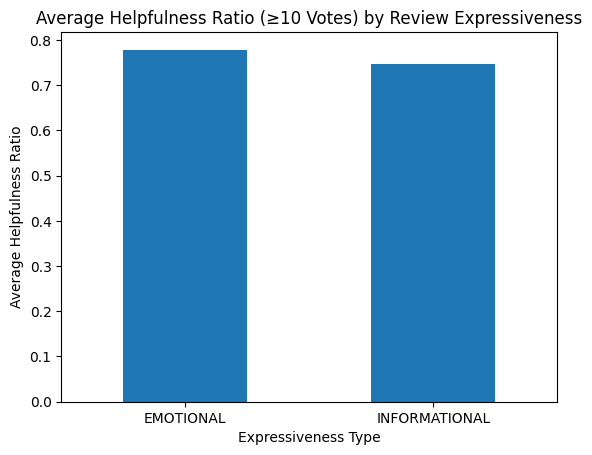

In [38]:
# Visualizing average helpfulness ratio for reviews with at least 10 votes, by expressiveness type

plt.figure()
mean_helpfulness.plot(kind="bar")
plt.title("Average Helpfulness Ratio (≥10 Votes) by Review Expressiveness")
plt.xlabel("Expressiveness Type")
plt.ylabel("Average Helpfulness Ratio")
plt.xticks(rotation=0)
plt.show()